# Ceneo Analyzer

### Bilbioteki

In [20]:
import os
import pandas as pd
from matplotlib import pyplot as plt

### Lista kodów produktów o których zostały pobrane opinie

In [21]:
print(*[filename.split(".")[0] for filename in os.listdir("opinions")], sep = "\n")

114700014
11740014


### Kod produktu, którego opinie mają zostać przeanalizowane

In [15]:
product_id = input("Proszę podać kod produktu z serwisu CeneoPL")

#### Wczytanie do obiektu terminal source .venv/Scripts/activate --> pip install pandas

### Wczytanie do obiektu pandas.DataFrame opinii o wskazanym produkcie

In [16]:
opinions = pd.read_json(f'opinions/{product_id}.json')
opinions.rating = opinions.rating.apply(lambda r: r.split("/")[0].replace(",","."),).astype(float)
opinions.recommendation = opinions.recommendation.apply(lambda r: "Brak" if r is None else r)

In [ ]:
#opinions

: 

In [7]:
opinions_count = opinions.shape[0] 
pros_count = opinions.pros.apply(lambda p: True if p else False).sum()
cons_count = opinions.pros.apply(lambda p: True if p else False).sum()
average_rating = opinions.rating.mean()

AttributeError: 'DataFrame' object has no attribute 'rating'

In [18]:
opinions_count

182

In [19]:
pros_count

NameError: name 'pros_count' is not defined

## Histogram częstości poszczególnych ocen produktu

In [10]:
rating_distribution = opinions.rating.value_counts().reindex(np.arange(0,5.5,0.5), fill_value = 0)
rating_distribution

NameError: name 'opinions' is not defined

In [ ]:
fig, ax = plt.subplots()
rating_distribution.plot.bar(color = 'lightblue')
plt.title("Histogram częstośi gwiazdek")
plt.xlabel("Liczba gwiazdek")
plt.ylabel("Liczba opinii")
plt.xticks(rotation=0)
plt.bar_label(ax.containers[0], label_type = "edge")

: 

## Udział poszczególnych rekomandacji w opiniach

In [29]:
recommendations_distribution = opinions.recommendation.value_counts().reindex(["Polecam","Nie polecam","Brak rekomendacji"])
recommendations_distribution

recommendation
Polecam              176.0
Nie polecam            3.0
Brak rekomendacji      NaN
Name: count, dtype: float64

ValueError: Invalid color deepppink

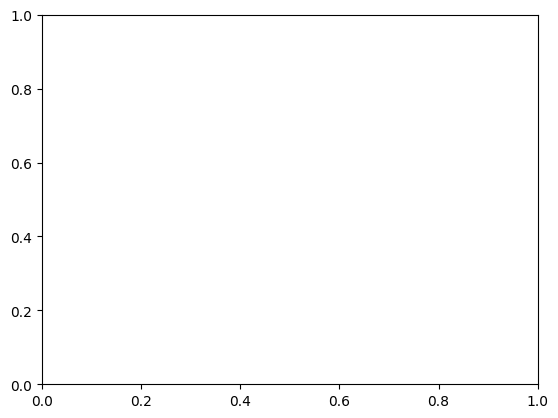

In [33]:
recommendations_distribution.plot.pie(
    colors = ["hotpink", "lavenderblush", "deeppink"],
    autopct = "%1.1f%%",
    label = ''
)
plt.title("Udział rekomendacji w opiniach")